In [1]:
import torch.optim as optim
import gymnasium as gym

from simple_ppo import PPO
from simple_ppo.policy import ContinuMlpPolicy
from simple_ppo.utils import evaluate, plot

In [2]:
policy = ContinuMlpPolicy(state_dim=11, action_dim=3, sd_init=0.6, sd_rng=(0.01, 0.6))
optimizer = optim.Adam(policy.parameters(), lr=0.0001)

In [3]:
env = gym.make('Hopper-v4', render_mode=None)
env_eval = gym.make('Hopper-v4', render_mode=None)

agent = PPO(policy, optimizer, env, env_eval,
            gamma=0.99, gae_lambda=0.95, n_step=4096, batch_size=128, n_epochs=32,
            clip_eps=0.1, vf_coef=1.0, ent_coef=0.01, max_grad_norm=1.0,
            eval_num=4)

log = agent.train(total_timesteps=1000000)

env.close()
env_eval.close()

/Users/pietrosig/RL_PROJECT/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment Hopper-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(
/Users/pietrosig/RL_PROJECT/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment Hopper-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


| timestep   4096 | policy  -16.903 | value  +11.468 | entropy   +0.868 | reward  +226.5 |
| timestep   8192 | policy  -18.262 | value  +15.500 | entropy   +0.798 | reward  +238.9 |
| timestep  12288 | policy  -16.780 | value  +15.428 | entropy   +0.740 | reward  +250.8 |
| timestep  16384 | policy  -20.678 | value  +19.274 | entropy   +0.681 | reward  +252.1 |
| timestep  20480 | policy  -19.824 | value  +19.559 | entropy   +0.630 | reward  +259.6 |
| timestep  24576 | policy  -19.614 | value  +19.756 | entropy   +0.591 | reward  +249.4 |
| timestep  28672 | policy  -18.965 | value  +20.132 | entropy   +0.556 | reward  +248.5 |
| timestep  32768 | policy  -17.056 | value  +19.366 | entropy   +0.518 | reward  +256.2 |
| timestep  36864 | policy  -15.954 | value  +19.392 | entropy   +0.492 | reward  +266.7 |
| timestep  40960 | policy  -14.144 | value  +18.885 | entropy   +0.478 | reward  +266.5 |
| timestep  45056 | policy  -13.142 | value  +19.052 | entropy   +0.468 | reward  +267.4 |

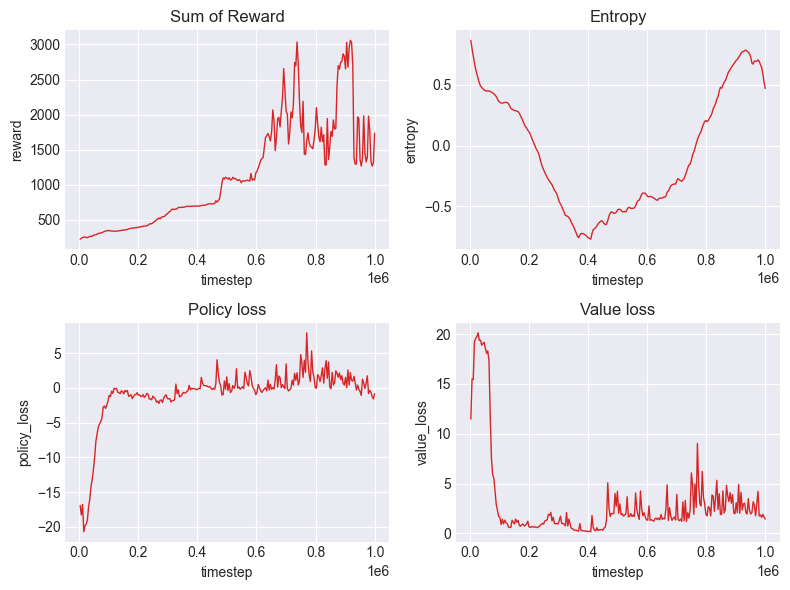

In [7]:
plot(log)

In [8]:
policy.load("./model_weights/Hopper-v4")

In [9]:
env = gym.make('Hopper-v4', render_mode=None)
mean, std = evaluate(policy, env, eval_num=32)
env.close()

print('mean : %f    std : %f'%(mean, std))

/Users/pietrosig/RL_PROJECT/.venv/lib/python3.10/site-packages/gymnasium/envs/registration.py:517: DeprecationWarning: WARN: The environment Hopper-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


mean : 3055.864746    std : 153.938293


In [10]:
env = gym.make('Hopper-v4', render_mode='human')
evaluate(policy, env, eval_num=1, deterministic=True)
env.close()

/Users/pietrosig/RL_PROJECT/.venv/lib/python3.10/site-packages/glfw/__init__.py:917: GLFWError: (65537) b'The GLFW library is not initialized'
  warnings.warn(message, GLFWError)
